In [3]:
import keras
from keras.applications import DenseNet121 #DenseNet121, DenseNet169, DenseNet201, ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from label_dict import label_dict

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Build the framework of neural network
* If you want to try different neural network, please change the name neural network above and below.

In [4]:
#Build the new model based on DenseNet121
def getmodel(num_classes=256):
    '''
    Build the new model based on DenseNet121, DenseNet169, DenseNet201
    
    Argument:
    num_classes -- (int) number of classes
    
    Return:
    model -- the new compiled model
    '''
    
    orig_model = DenseNet121(include_top=False, weights='imagenet', pooling='avg', classes=num_classes)
    densenet_out = orig_model.layers[-1].output
    out = Dense(256, activation='softmax', kernel_initializer='glorot_uniform')(densenet_out)
    model = Model(input=orig_model.input, output=out)
    model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [5]:
model = getmodel(256)

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  app.launch_new_instance()


In [59]:
#Import demo dataset
X_test = np.load('demo_img.npy')/255.
y_test = np.load('demo_label.npy')

In [7]:
print('The number of demo images is: '+str(X_test.shape[0]))

The number of demo images is: 1699


## Import trained model and perdict the image
* You can change the name of model.

In [8]:
model.load_weights('DenseNet121_transfer.hdf5')

In [9]:
#evaluate
eva = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print("Loss = " + str(eva[0]))
print("Test Accuracy = " + str(eva[1]))

1699/1699 [==============================] - 11s 6ms/step
()
Loss = 0.29296252451987514
Test Accuracy = 0.9799882283696292


## Predict a new image
* You can change the predict_num. The range is between 0 and 1698.

This image is: hawksbill-101
The dict_label of image is: 100


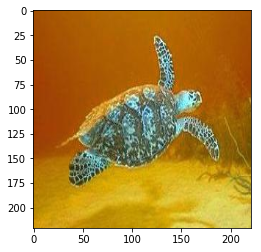

In [10]:
#predict a new image
predict_num = 1698
dict_label = label_dict()
X_predict = X_test[predict_num]
print('This image is: ' + dict_label[y_test[predict_num]+1])
print('The dict_label of image is: '+str(y_test[predict_num]+1))
plt.imshow(X_predict)

In [11]:
#predict
predict_vector = model.predict(np.expand_dims(X_predict, axis=0))
index = np.where(predict_vector[0] == np.max(predict_vector[0]))
print('The predict dict_label of image is: '+str(index[0][0]+1))
print('The predict probability of image is: '+str(predict_vector[0, index[0][0]]))
print('This image is: ' + dict_label[index[0][0] + 1])

The predict dict_label of image is: 100
The predict probability of image is: 1.0
This image is: hawksbill-101
